#https://github.com/matiaseiglesias/adc

In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
G1 = ctl.tf([1, 0 ,2500], [1])
G2 = ctl.tf([1], [1, 60, 2500])

In [4]:
print(G1)
print(G2)


s^2 + 2500
----------
    1


        1
-----------------
s^2 + 60 s + 2500



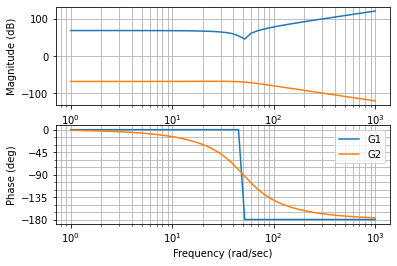

<Figure size 36000x36000 with 0 Axes>

In [5]:
ctl.bode(G1, dB=True, label='G1')
ctl.bode(G2, dB=True, label='G2')
plt.legend()
plt.figure(figsize=(500,500))
plt.show()

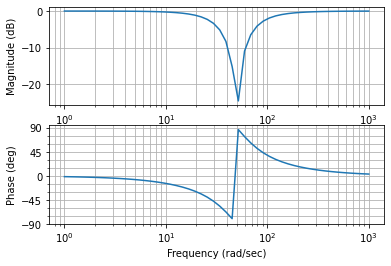

<Figure size 36000x36000 with 0 Axes>

In [8]:
ctl.bode(G1*G2, dB=True)
plt.figure(figsize=(500,500))
plt.show()

In [29]:
from sympy import symbols, expand

In [26]:
s = symbols('s')

In [31]:
expand((s - np.complex(-30, 40))*(s - np.complex(-30, -40)))

s**2 + 60.0*s + 2500.0

In [37]:
from scipy import signal
import control.matlab as ml
from math import pi

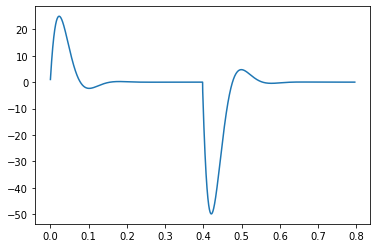

In [38]:
frecuencia = 2*pi/5 #en Hz
periodo = 1/frecuencia #en segundos
t = np.linspace(0, 1*periodo, 100000, endpoint=False)

sig = signal.square(2 * np.pi * frecuencia * t) #Respuesta a la cuadrada
#sig = np.sin(2*np.pi*frecuencia*t) #Respuesta al seno

yout, T, xout = ml.lsim(G1*G2, U = sig, T = t)
plt.plot(T,yout)
#plt.plot(t, sig)
plt.show()